In [1]:
import sys
sys.path.append('../../dmrt/')
sys.path.append('../../lange/')

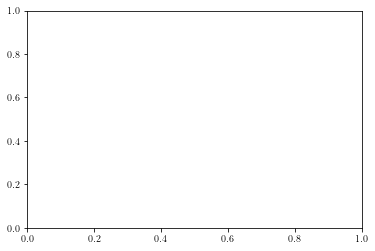

In [2]:
import diffTools
import numpy as np
import matplotlib.pyplot as plt
import pylange

In [3]:
# Do doublewell simulation and analyse

difft = diffTools.DiffTools()
inp = pylange.lange(P=6,N=1,m=1,G=1, dt=0.01)
radii=np.linspace(-2,2,40)

In [41]:
# Check output consistency
i1,i2=5,10
dists,tms,cts,errs,upts,fptDist,tptDist = difft.compute(inp[:,:2], mode='mfptcrossdist',radii=radii,verb=True)
print("Num FPTs:",len(fptDist[i1][i2]),"Num counts:",cts[i1][i2])
print("Num TPTs:",len(tptDist[i1][i2]),"Num Upts:",upts[i1][i2])
print("Mean FPTs:",np.mean(fptDist[i1][i2]),"MFPT:",tms[i1][i2])
print("Err FPTs:",np.sqrt(np.var(fptDist[i1][i2])/cts[i1][i2]),"MFPT Err:",errs[i1][i2],"Weak Err. estimate:", np.sqrt(tms[i1][i2]/upts[i1][i2]))

Num FPTs: 2970 Num counts: 2970
Num TPTs: 1485 Num Upts: 1485
Mean FPTs: 0.13456619445553858 MFPT: 0.13456619445553858
Err FPTs: 0.0008977117668455064 MFPT Err: 0.000897386601255158 Weak Err. estimate: 0.009519294404698578


../../dmrt/diffTools.py:41: RuntimeWarning: invalid value encountered in true_divide
  tms = tms/cts
../../dmrt/diffTools.py:42: RuntimeWarning: invalid value encountered in true_divide
  errs = np.sqrt(wars)/cts


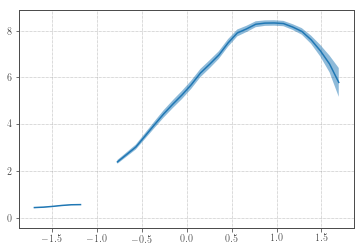

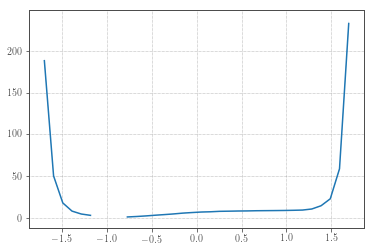

In [26]:
# Inertial Effekte erzeugen schnellere mftps an steilen reflektierenden Grenzen
index=10
# MFPTs mit variablen x_ini (und festem x_final)
plt.fill_between(dists[3:-3],tms.T[index,3:-3]-errs.T[index,3:-3],tms.T[index,3:-3]+errs.T[index,3:-3],alpha=0.5)
plt.plot(dists[3:-3],tms.T[index,3:-3])
#plt.plot(dists[3:-3],tms.T[-10,3:-3])
plt.show()

# MFPTs mit variablen x_final (und festem x_ini)
plt.fill_between(dists[3:-3],tms[index,3:-3]-errs[index,3:-3],tms[index,3:-3]+errs[index,3:-3],alpha=0.5)
plt.plot(dists[3:-3],tms[index,3:-3])
#plt.plot(dists[3:-3],tms[-10,3:-3])
plt.show()

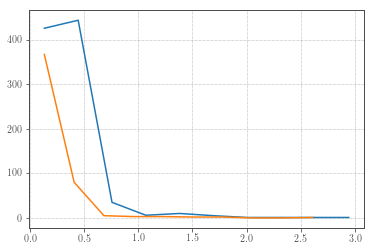

In [27]:
hist, bins = np.histogram(fptDist[i1][i2])
plt.plot(bins[:-1],hist)
hist, bins = np.histogram(tptDist[i1][i2])
plt.plot(bins[:-1],hist)
plt.show()

In [31]:
difft = diffTools.DiffTools()
inp = pylange.lange(P=6,N=1,M=1,m=0.1, dt=0.01)
radii=np.linspace(-2,2,40)
print(radii)

[-2.         -1.8974359  -1.79487179 -1.69230769 -1.58974359 -1.48717949
 -1.38461538 -1.28205128 -1.17948718 -1.07692308 -0.97435897 -0.87179487
 -0.76923077 -0.66666667 -0.56410256 -0.46153846 -0.35897436 -0.25641026
 -0.15384615 -0.05128205  0.05128205  0.15384615  0.25641026  0.35897436
  0.46153846  0.56410256  0.66666667  0.76923077  0.87179487  0.97435897
  1.07692308  1.17948718  1.28205128  1.38461538  1.48717949  1.58974359
  1.69230769  1.79487179  1.8974359   2.        ]


In [35]:
dists,tms,cts,errs,upts, = difft.compute(inp[:,:2], mode='mfptcross',radii=radii,verb=True)
print("Num counts:",cts[i1][i2])
print("Num Upts:",upts[i1][i2])
print("MFPT:",tms[i1][i2])
print("MFPT Err:",errs[i1][i2])

Num counts: 2970
Num Upts: 1485
MFPT: 0.13456619445553858
MFPT Err: 0.000897386601255158


../../dmrt/diffTools.py:41: RuntimeWarning: invalid value encountered in true_divide
  tms = tms/cts
../../dmrt/diffTools.py:42: RuntimeWarning: invalid value encountered in true_divide
  errs = np.sqrt(wars)/cts


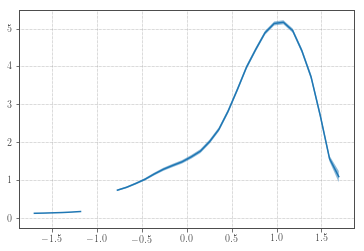

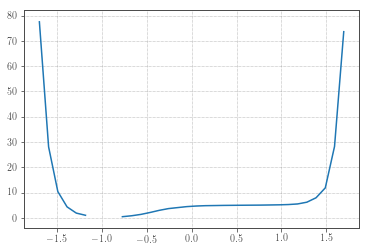

In [36]:
# Memory Effekte erzeugen schnellere mftps an steilen reflektierenden Grenzen

index=10
# MFPTs mit variablen x_ini (und festem x_final)
plt.fill_between(dists[3:-3],tms.T[index,3:-3]-errs.T[index,3:-3],tms.T[index,3:-3]+errs.T[index,3:-3],alpha=0.5)
plt.plot(dists[3:-3],tms.T[index,3:-3])
#plt.plot(dists[3:-3],tms.T[-10,3:-3])
plt.show()

# MFPTs mit variablen x_final (und festem x_ini)
plt.fill_between(dists[3:-3],tms[index,3:-3]-errs[index,3:-3],tms[index,3:-3]+errs[index,3:-3],alpha=0.5)
plt.plot(dists[3:-3],tms[index,3:-3])
#plt.plot(dists[3:-3],tms[-10,3:-3])
plt.show()